<a href="https://colab.research.google.com/github/MuhammadHelmyOmar/Hadith/blob/main/LK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tasks

- ~Explore the LK for other authenticity level~
- How many hadiths you can't map to existed authenticity level?
  - Cluster grade words and visualize to manually check (better than automatic similarity checks)

# Ideas
- Cluster grade words

# Loading Data

## AbuDaud

In [28]:
import pandas as pd
import requests

nl = '\n'

In [15]:
# Go up one directory level to get the list of files
directory_url = 'https://api.github.com/repos/ShathaTm/LK-Hadith-Corpus/contents/AbuDaud'

response = requests.get(directory_url)
response.raise_for_status() # Raise an exception for bad status codes
files = response.json()

csv_files = [file['download_url'] for file in files if file['name'].endswith('.csv')]

print(f"Found {len(csv_files)} CSV files in the directory.")

# Creating a dataframe for all
abudaud_data = pd.DataFrame()

for csv_url in csv_files:
    try:
        chapter = pd.read_csv(csv_url)
        abudaud_data = pd.concat([abudaud_data, chapter], ignore_index=True)
    except Exception as e:
        print(f"Error reading {csv_url}: {e}")

abudaud_data.head()

Found 43 CSV files in the directory.


,Chapter_Number,Chapter_English,Chapter_Arabic,Section_Number,Section_English,Section_Arabic,Hadith_number,English_Hadith,English_Isnad,English_Matn,Arabic_Hadith,Arabic_Isnad,Arabic_Matn,Arabic_Comment,English_Grade,Arabic_Grade
0,1.0,Purification (Kitab Al-Taharah),كتاب الطهارة,1.0,Seclusion While Relieving Oneself,باب التَّخَلِّي عِنْدَ قَضَاءِ الْحَاجَةِ,1.0,Narrated Mughirah ibn Shu'bah: When the Prophe...,Narrated Mughirah ibn Shu'bah:,When the Prophet (ﷺ) went (outside) to relieve...,حَدَّثَنَا عَبْدُ اللَّهِ بْنُ مَسْلَمَةَ بْنِ...,حَدَّثَنَا عَبْدُ اللَّهِ بْنُ مَسْلَمَةَ بْنِ...,أَنَّ النَّبِيَّ صلى الله عليه وسلم كَانَ إِذَ...,NaN,Hasan Sahih,حسن صحيح
1,1.0,Purification (Kitab Al-Taharah),كتاب الطهارة,1.0,Seclusion While Relieving Oneself,باب التَّخَلِّي عِنْدَ قَضَاءِ الْحَاجَةِ,2.0,Narrated Jabir ibn Abdullah: When the Prophet ...,Narrated Jabir ibn Abdullah:,When the Prophet (ﷺ) felt the need of relievin...,حَدَّثَنَا مُسَدَّدُ بْنُ مُسَرْهَدٍ، حَدَّثَن...,حَدَّثَنَا مُسَدَّدُ بْنُ مُسَرْهَدٍ، حَدَّثَن...,أَنَّ النَّبِيَّ صلى الله عليه وسلم كَانَ إِذَ...,NaN,Sahih - Authentic,صحيح
2,1.0,Purification (Kitab Al-Taharah),كتاب الطهارة,2.0,Choosing An Appropriate Place To Urinate,باب الرَّجُلِ يَتَبَوَّأُ لِبَوْلِهِ,3.0,Abu al-Tayyah reported on the authority of a s...,Abu al-Tayyah reported on the authority of a s...,"When Abdullah ibn Abbas came to Basrah, people...",حَدَّثَنَا مُوسَى بْنُ إِسْمَاعِيلَ، حَدَّثَنَ...,حَدَّثَنَا مُوسَى بْنُ إِسْمَاعِيلَ، حَدَّثَنَ...,قَالَ لَمَّا قَدِمَ عَبْدُ اللَّهِ بْنُ عَبَّا...,NaN,Daif - Weak,ضعيف
3,1.0,Purification (Kitab Al-Taharah),كتاب الطهارة,3.0,What A Person Should Say When He Enters The Ar...,باب مَا يَقُولُ الرَّجُلُ إِذَا دَخَلَ الْخَلاَءَ,4.0,Anas b. Malik reported: When the Apostle of Al...,Anas b. Malik reported:,When the Apostle of Allaah (sal Allahu alayhi ...,حَدَّثَنَا مُسَدَّدُ بْنُ مُسَرْهَدٍ، حَدَّثَن...,حَدَّثَنَا مُسَدَّدُ بْنُ مُسَرْهَدٍ، حَدَّثَن...,كَانَ رَسُولُ اللَّهِ صلى الله عليه وسلم إِذَا...,NaN,Sahih - Authentic,صحيح
4,1.0,Purification (Kitab Al-Taharah),كتاب الطهارة,3.0,What A Person Should Say When He Enters The Ar...,باب مَا يَقُولُ الرَّجُلُ إِذَا دَخَلَ الْخَلاَءَ,5.0,Another tradition on the authority of Anas has...,Another tradition on the authority of Anas has:,""" O Allaah, I seek refuge in Thee.""Shu'bah sai...",حَدَّثَنَا الْحَسَنُ بْنُ عَمْرٍو، - يَعْنِي ا...,حَدَّثَنَا الْحَسَنُ بْنُ عَمْرٍو، يَعْنِي الس...,بِهَذَا الْحَدِيثِ قَالَ اللَّهُمَّ إِنِّي أَع...,NaN,Shadh,شاذ


In [30]:
print(len(abudaud_data), nl)
print(abudaud_data.columns, nl)
print(len(abudaud_data.columns), nl)

5138 

Index(['Chapter_Number', 'Chapter_English', 'Chapter_Arabic', 'Section_Number',
       'Section_English', 'Section_Arabic', 'Hadith_number', 'English_Hadith',
       'English_Isnad', 'English_Matn', 'Arabic_Hadith', 'Arabic_Isnad',
       'Arabic_Matn', 'Arabic_Comment', 'English_Grade', 'Arabic_Grade'],
      dtype='object') 

16 



In [36]:
print(abudaud_data.English_Grade.describe(), nl)
print(abudaud_data.Arabic_Grade.describe(), nl)

count                  4876
unique                   39
top       Sahih - Authentic
freq                   3151
Name: English_Grade, dtype: object 

count     5138
unique     295
top       صحيح
freq      3151
Name: Arabic_Grade, dtype: object 



> English_Grade is less in length and unique values.
  - Indicating missing values.



In [39]:
print(abudaud_data.English_Grade.value_counts(), nl)
print(abudaud_data.Arabic_Grade.value_counts(), nl)

English_Grade
Sahih - Authentic                                                                3151
Daif - Weak                                                                       714
Hasan - Good                                                                      368
Hasan Sahih                                                                       217
Da'if in chain                                                                    100
Sahih in chain                                                                     67
Sahih Maqtu'                                                                       52
Sahih li ghairih                                                                   36
                                                                                   32
Hasan in chain                                                                     30
Munkar                                                                             21
Shadh                                   

In [71]:
english_grade_counts = abudaud_data['English_Grade'].value_counts()
arabic_grade_counts = abudaud_data['Arabic_Grade'].value_counts()

for i in range(len(english_grade_counts)):
  if english_grade_counts[i] != arabic_grade_counts[i]:
    print("discrepancy")
  else:
    print(english_grade_counts.keys()[i] + ' || ' + arabic_grade_counts.keys()[i])

Sahih - Authentic || صحيح
Daif - Weak || ضعيف
Hasan - Good || حسن
Hasan Sahih || حسن صحيح
Da'if in chain || ضعيف الإسناد
Sahih in chain || صحيح الإسناد
Sahih Maqtu' || صحيح مقطوع
Sahih li ghairih || صحيح لغيره
discrepancy
discrepancy
discrepancy
Shadh || صحيح الإسناد مقطوع
Sahih Mauquf || صحيح موقوف
Hasan li ghairih || حسن لغيره
discrepancy
discrepancy
Da'if Maqtu' || حسن مقطوع
discrepancy
discrepancy
discrepancy
discrepancy
discrepancy
discrepancy
Mawdu' (Fabricated) || صحيح بلفظ أي الصلاة
Sahih Marfu' || ضعيف منكر
discrepancy
discrepancy
discrepancy
discrepancy
discrepancy
discrepancy
discrepancy
discrepancy
discrepancy
discrepancy
Da'if Maqtu' Munkar || حسن إلا قوله ومن حلف فهو منكر
Da'if Munkar, and the Sahih version is 19 days as in a previous hadith. || "(قوله: قال: "" هل بها وثن أو عيد من أعياد الجاهلية؟ "" قال: لا) **، (قوله: قلت: إن أمي هذه عليها نذر..... قال: نعم) صحيح"
Sahih Mauquf Marfu' || ضعيف وصح بلفظ آخر
Sahih Mauquf and Marfu' || ضعيف مرفوعا


### Visualizations

In [72]:
import matplotlib.pyplot as plt

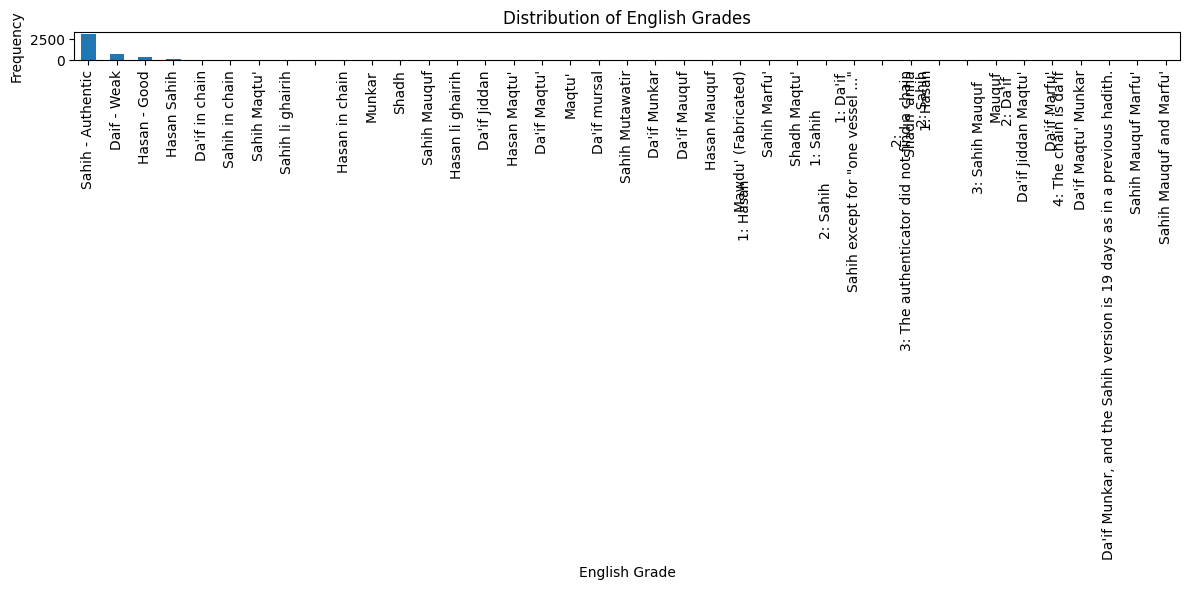

In [73]:
# Get the value counts of 'English_Grade'
english_grade_counts = abudaud_data['English_Grade'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
english_grade_counts.plot(kind='bar')
plt.title('Distribution of English Grades')
plt.xlabel('English Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()